# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [ ]:
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

In [ ]:
clus <-Mclust(datos, G=4)
summary(clus)

clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl


Ejercicio 1: 
a) Explique como funciona el método Mclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 

mclust es un paquete de R contribuido para la agrupación basada en modelos, la clasificación y la estimación de densidad basada en un modelo de mezcla finita normal. Proporciona funciones para la estimación de parámetros a través del algoritmo EM para modelos de mezcla normal con una variedad de estructuras de covarianza y funciones para la simulación de estos modelos. También se incluyen funciones que combinan el agrupamiento jerárquico basado en modelos, EM para la estimación de mezclas y el Criterio de Información Bayesiano (BIC) en estrategias integrales para agrupamiento, estimación de densidad y análisis discriminante. Existen funciones adicionales disponibles para mostrar y visualizar modelos ajustados junto con resultados de agrupamiento, clasificación y estimación de densidad.

Parámetros de entrada:
Número de grupos(G): Número de grupos de agrupamiento a utilizar.
Nombre del modelo a utilizar(modelNames): Un vector de cadenas de caracteres que indica los modelos que se ajustarán en la fase EM del agrupamiento.

Se agruparon las categorias de la tabla de datos en 4 grupos, según fue espicificado en los parametros de entrada de la función. Se observa que si bien la mayoria de las categorias de entrada se encuentras próximas en el gráfico, hay algunas que están dispersas, tal es el caso de algunas caregorias pertenecientes a la agrupación 2. Esto puede significar un número de argrupaciones que no es la más eficiente.

In [ ]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


Ejercicio 2: Repita el procedimiento considerando 2, 3 y 4 grupos. Discuta y compare  sus resultados con aquellos obtenidos con k-means

OBTENIENDO MODELO Y NUMERO DE GRUPOS con minima función de PERDIDA.

In [ ]:
BIC <- mclustBIC(datos)
plot(BIC)

Número de grupos con minima funcion de perdida dado los datos.

PARA G=2 Y MODELO EEV

In [ ]:
clus <-Mclust(datos, G=2, modelNames = "EEV")
cl <- clus$classification
centers <- t(clus$parameters$mean)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)
biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)

PARA G=3 Y MODELO EEV

In [ ]:
clus <-Mclust(datos, G=3, modelNames = "EEV")
cl <- clus$classification
centers <- t(clus$parameters$mean)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)
biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)

PARA G=4 Y MODELO EEV

In [ ]:
clus <-Mclust(datos, G=4, modelNames = "EEV")
cl <- clus$classification
centers <- t(clus$parameters$mean)
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)
biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)

En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

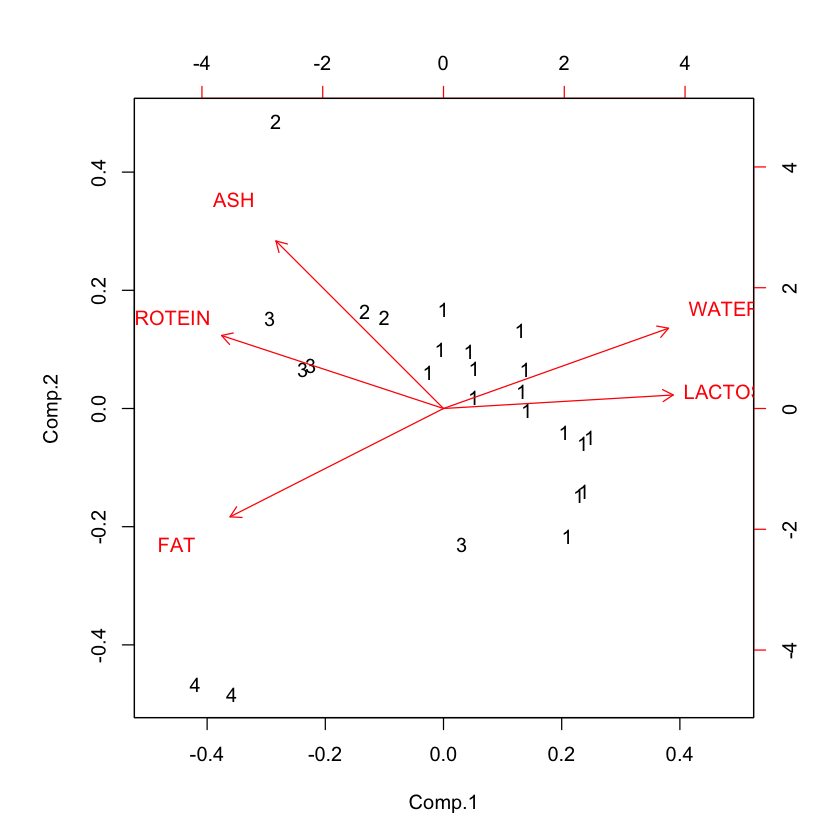

In [26]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

Ejercicio 3: 
a) Explique como funciona el método hclust, describa parámetros de entrada y salida.
b) Interprete y comente los resultados obtenidos. 
c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

Análisis de agrupamiento jerárquico sobre un conjunto de disimilitudes y métodos para analizarlo.

hclust(d, method = "complete", members = NULL)

d: Estructura de disimilitud.<br><br>
método: El método de aglomeración a utilizar. Debe ser (una abreviatura inequívoca de) una de "ward.D", "ward.D2", "single", "complete", "average" (= UPGMA), "mcquitty" (= WPGMA), "median" (= WPGMC) o "centroide" (= UPGMC).<br><br>
miembros: NULL o un vector con longitud de d. Vea la sección "Detalles".

Esta función realiza un análisis de clúster jerárquico utilizando un conjunto de disimilitudes para los n objetos agrupados. Inicialmente, cada objeto se asigna a su propio clúster y luego el algoritmo avanza de forma iterativa, en cada etapa uniendo los dos clústeres más similares, continuando hasta que haya un solo clúster. En cada etapa, las distancias entre los grupos se vuelven a calcular con la fórmula de actualización de disimilitud de Lance-Williams de acuerdo con el método de agrupamiento particular que se está utilizando.

Una serie de diferentes métodos de agrupación se proporcionan. El método de variación mínima de Ward tiene como objetivo encontrar agrupaciones esféricas y compactas. El método de enlace completo encuentra grupos similares. El método de enlace único (que está estrechamente relacionado con el árbol de expansión mínima) adopta una estrategia de agrupación de "amigos de amigos". Se puede considerar que los otros métodos apuntan a agrupaciones con características en algún lugar entre los métodos de enlace único y completo. Sin embargo, tenga en cuenta que los métodos "mediana" y "centroide" no conducen a una medida de distancia monótona, o equivalentemente, los dendrogramas resultantes pueden tener las llamadas inversiones o inversiones que son difíciles de interpretar, pero tenga en cuenta las tricotomías en Legendre y Legendre (2012) .

Ejercicio 4: 
a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv
Interprete sus resultados.
b) Calcule alguna de las medidas de calidad estudiadas (purity, rand index o mutual information) 
para cada uno de los análisis realizado en (a). Discuta sus resultados.

In [ ]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)